In [44]:
import torch
import matplotlib.pyplot as plt
import numpy as np 

### Collecting gradient

In [45]:
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

In [46]:
q = 3*a**3 - b**2

In [47]:
grad_arg = torch.ones(q.shape)
print(grad_arg.shape)
q.backward(gradient=grad_arg)

torch.Size([2])


In [155]:
def plot_grad(a, q, title=None): 
    """
        Given a list of variables, 
        return a basic polynomial operation
    """
    
    q2 = torch.clone(q).detach()
    
    grad_arg = torch.ones(q.shape[0])
    q.backward(gradient=grad_arg)
    
    a2 = a.detach().numpy()
    
    plt.plot(a2, q2, "bo", label="y")
    plt.plot(a2, a.grad, "ro", label="dy") 
    
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    if title: 
        plt.title(title)
    plt.show()
    

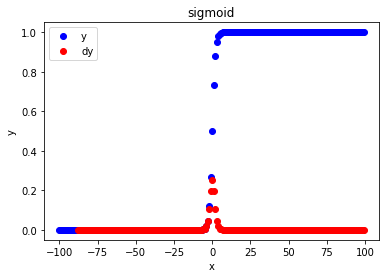

In [156]:
a = np.arange(-100,100)
a = torch.tensor(a, dtype=torch.float32, requires_grad=True)
q = 1/(1+torch.exp(-a))
plot_grad(a, q, "sigmoid")

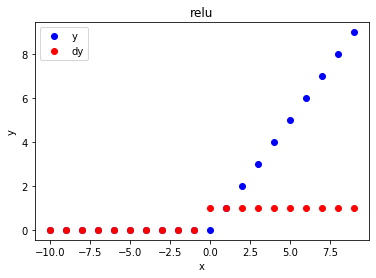

In [159]:
a = np.arange(-10,10)
a = torch.tensor(a, dtype=torch.float32, requires_grad=True)
q = torch.maximum(torch.Tensor([0.0]), a)
plot_grad(a,q,"relu")